# Algeria Data Cup by Temtem purchase prediction challenge
In this notebook, I am doing many tasks:
- [1. Importing packages and data <a name='Importing data'></a>](#toc_1)
- [2. Exploratory Data Analysis <a name='Exploratory Data Analysis'></a>](#toc_2)
- [3. Feature Engineering <a name='Feature Engineering'></a>](#toc_3)
- [4. Machine Learning <a name='Machine Learning'></a>](#toc_4)

PS: You will find details about data files and columns in the <b>Read me</b> file

<a name="toc_1"></a>
## 1. Importing packages and data <a name='Importing data'></a>
Packages used :<br>
- Pandas
- NumPy
- Date Time
- Matplotlib
- Plotly
- Scikit-learn

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objs as go
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings 
warnings.filterwarnings("ignore")

np.random.seed(42)
np.random.RandomState(42)

RandomState(MT19937) at 0x2024481D040

In [2]:
train_set = pd.read_csv('Train.csv')
test_set = pd.read_csv('Test.csv')

<a name="toc_2"></a>
## 2. Exploratory Data Analysis <a name='Exploratory Data Analysis'></a>

In [3]:
train_set.sample(5)

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,Purchase Again
15275,7222180772,COMPLETED,NaN,Isabel Thon A L'Huile 400G,1,560,560,7622,200200,CARD_PAY,1.672763e+10,23255526,2021-02-07 20:47:08,Algeria,1
7985,3009727905,COMPLETED,NaN,Bimo Galettes,1,90,90,18834,200200,CARD_PAY,6.733766e+06,23255526,2021-01-18 19:59:45,Algeria,0
8085,2862843732,COMPLETED,NaN,Amor Benamor Spaghetti N7 500G,3,85,255,19273,200200,CARD_PAY,3.274221e+09,23255526,2021-01-18 23:09:12,Algeria,0
6323,3977429011,COMPLETED,NaN,LESIEUR mais doux 1/2,1,180,180,20811,200200,CASH_PAY,7.645986e+09,23255526,2021-01-15 18:25:19,Algeria,0
5155,1626504632,COMPLETED,HygiÃ¨ne feminine,AWANE Confort 3d longue,1,90,90,6410,200200,CARD_PAY,4.012795e+09,6158523,2021-01-14 16:51:44,Algeria,0


In [4]:
test_set.sample(5)

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country
4598,12740701270,COMPLETED,NaN,REGALO biscuit digestive foure noisette,2,60,120,3057,200200,CARD_PAY,7.809062e+06,23255526,2021-01-15 19:32:11,Algeria
258,8257393,REJECTED,Conserves,GOLDEN LAND mais doux 340g,2,150,300,7430,200200,CASH_PAY,5.447428e+06,6158523,2021-01-02 06:40:20,Algeria
4845,2489153516,COMPLETED,NaN,EXTRA couscous moyen 1kg,1,155,155,8297,200200,CASH_PAY,1.979111e+10,23255526,2021-01-16 00:05:49,Algeria
2169,1869380000000,REJECTED,Pates et riz,MAHBOUBA lasagne 500g,2,150,300,13727,200200,CASH_PAY,8.335292e+06,6158523,2021-01-08 20:34:33,Algeria
6477,2382583684,COMPLETED,NaN,VERTEX COMPAS + Kit de Mesure 4 Pieces Plastiq...,1,685,685,5935,290290,CARD_PAY,8.026946e+06,22566453,2021-01-20 10:36:43,Algeria


<br>This is a function I use to summarize information about my sets :

In [5]:
def summary(data) : 
    """ Take a pandas dataframe and create a summary about missing values """
    result = (pd.DataFrame(data.dtypes, columns=["Data Type"]).reset_index().rename(columns={'index': 'Column'}))
    result["Unique"] = data.nunique().values
    result["Null"] = data.isna().sum().values
    result["%null"] = np.round(data.isna().sum().values / data.shape[0] * 100, decimals=2)
    return result

In [6]:
summary(train_set)

,Column,Data Type,Unique,Null,%null
0,Order ID,int64,2212,0,0.00
1,Order Status,object,6,0,0.00
2,Category Name,object,165,8668,48.80
3,Product Name,object,2917,0,0.00
4,Quantity,int64,34,0,0.00
5,Unit Price,object,459,0,0.00
6,Total Price,object,719,0,0.00
7,Sub Total,object,1108,516,2.91
8,Delivery Charge,object,78,30,0.17
9,Payment Method,object,4,435,2.45


In [7]:
summary(test_set)

,Column,Data Type,Unique,Null,%null
0,Order ID,int64,1442,0,0.00
1,Order Status,object,6,0,0.00
2,Category Name,object,145,6014,50.06
3,Product Name,object,2494,0,0.00
4,Quantity,int64,34,0,0.00
5,Unit Price,object,415,0,0.00
6,Total Price,object,624,0,0.00
7,Sub Total,object,837,148,1.23
8,Delivery Charge,object,67,1,0.01
9,Payment Method,object,3,101,0.84


#### Observations :
- The two sets have the same columns => We concatenate them. 
- We have to group by Customer because he is the topic of our challenge. 
- `Category Name` column has too many missing values in bouth sets.

In [8]:
test_set.index = test_set.index + train_set.shape[0]
test_set.head()

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country
17761,8236741,COMPLETED,Chocolat,NUTELLA 750g,2,1390,2780,4740,550550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria
17762,8236741,COMPLETED,Chocolat,MILKA chocolat extra cacao 100g,1,210,210,4740,550550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria
17763,8236741,COMPLETED,Chocolat,MILKA strawberry 100g,1,210,210,4740,550550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria
17764,8236741,COMPLETED,Chocolat,LINDT les grandes noisette,1,900,900,4740,550550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria
17765,8236741,COMPLETED,Boisson,IFRI eau minerale 1.5l x 6,2,170,340,4740,550550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria


In [9]:
all_data = pd.concat([train_set.drop(labels="Purchase Again", axis=1), test_set])
all_data.head()

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country
0,8236617,DEFAULT,Promotions,03 fardeaux Ifri + 1 offert,30,480,14400,43650,200200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria
1,8236617,DEFAULT,Promotions,3 fardeaux coca achetes = 1 fardeau offert,15,1800,27000,43650,200200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria
2,8236617,DEFAULT,Promotions,Snickers mini cube 200g,5,450,2250,43650,200200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria
3,8236624,COMPLETED,Paves,Pave chocolat,3,100,300,1460,700700,CARD_PAY,6359544.0,17654385,2021-01-01 00:27:29,Algeria
4,8236624,COMPLETED,Tartes,Tarte citron,3,100,300,1460,700700,CARD_PAY,6359544.0,17654385,2021-01-01 00:27:29,Algeria


In [10]:
summary(all_data)

,Column,Data Type,Unique,Null,%null
0,Order ID,int64,3654,0,0.00
1,Order Status,object,6,0,0.00
2,Category Name,object,191,14682,49.31
3,Product Name,object,3461,0,0.00
4,Quantity,int64,44,0,0.00
5,Unit Price,object,527,0,0.00
6,Total Price,object,849,0,0.00
7,Sub Total,object,1703,664,2.23
8,Delivery Charge,object,83,31,0.10
9,Payment Method,object,4,536,1.80


### `Customer ID` column 
I don’t need data of unknown customers.<br>
But an `Order ID` has always a single `Customer ID`.<br>

In [11]:
orders = all_data[all_data["Customer ID"].isna()]["Order ID"].unique()
indexes = all_data[all_data["Customer ID"].isna()].index
for index in indexes :
    order = all_data.loc[index, "Order ID"]
    a = all_data[all_data["Order ID"]==order]["Customer ID"].mode().values
    if len(a) != 0 & order in orders :
        all_data.loc[index, "Customer ID"] = a
all_data["Customer ID"].isna().sum()

498

Oops It didnt work.<br>
Now, I have to delete missing values in the `Customer ID` column.

In [12]:
all_data = all_data.drop(labels=all_data[all_data["Customer ID"].isna()].index, axis=0)

### `Category Name` column 
There is too much missing values.<br>
I decided to <b>drop</b> it !<br>

In [13]:
all_data = all_data.drop(labels="Category Name", axis=1)

### `Order Status` column
I should make it categorical.

In [14]:
all_data["Order Status"] = all_data["Order Status"].astype("category")

In [15]:
all_data["Order Status"].unique()

['DEFAULT', 'COMPLETED', 'REJECTED', 'ACCEPTED', 'CANCELLED', 'SEND_TO_TMS']
Categories (6, object): ['ACCEPTED', 'CANCELLED', 'COMPLETED', 'DEFAULT', 'REJECTED', 'SEND_TO_TMS']

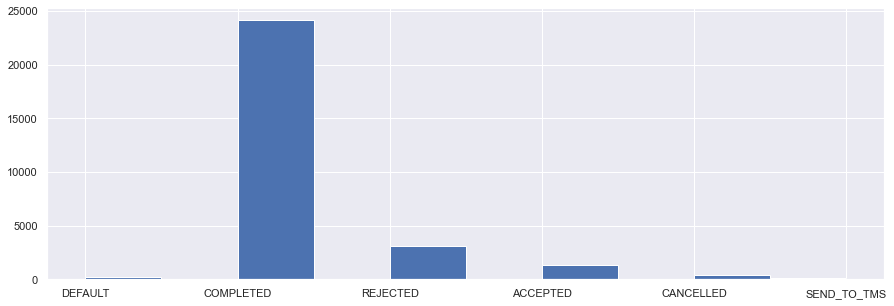

In [16]:
fig=plt.figure(figsize=(15, 5)) 
plt.hist(data=all_data, x="Order Status")
plt.show()

<br>The status <b>COMPLETED</b> is too more present than other status.

In [17]:
p = np.round(len(all_data[all_data["Order Status"] == "COMPLETED"]) / all_data.shape[0] * 100, 2)
print("The completed status is present by", p, "% in the data")

The completed status is present by 82.37 % in the data


I replaced all other status by `OTHERS`.<br>

In [18]:
categories = ['DEFAULT', 'REJECTED', 'ACCEPTED', 'CANCELLED', 'SEND_TO_TMS']
for category in categories :
    all_data["Order Status"] = all_data["Order Status"].replace(category, "OTHERS")

In [19]:
all_data["Order Status"].value_counts()

COMPLETED    24114
OTHERS        5162
Name: Order Status, dtype: int64

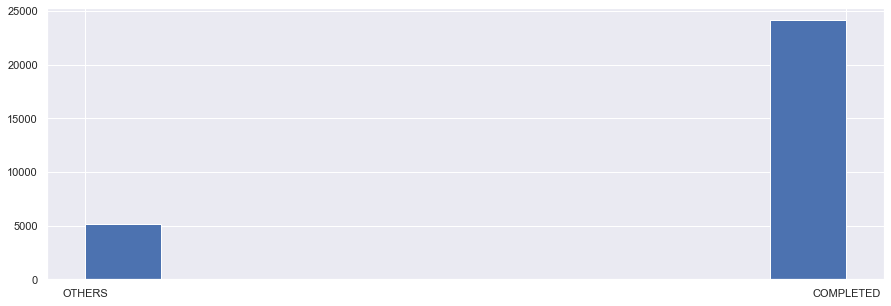

In [20]:
fig=plt.figure(figsize=(15, 5)) 
plt.hist(data=all_data, x="Order Status")
plt.show()

I put <b>`1` for completed</b> orders and <b>`0` for non-completed</b> orders.

In [21]:
statuses = all_data["Order Status"].unique()
for status in statuses :
    if status == "COMPLETED":
        all_data["Order Status"] = all_data["Order Status"].replace(status, 1)
    else :
        all_data["Order Status"] = all_data["Order Status"].replace(status, 0)
all_data["Order Status"].value_counts()

1    24114
0     5162
Name: Order Status, dtype: int64

### `Unit Price` & `Total Price` columns
These columns should be in a numeric type and invalid values should be corrected.

In [22]:
# Verifying non numerical values
all_data[pd.to_numeric(all_data["Unit Price"], errors='coerce').isna()]["Unit Price"].unique()

array(['01 Feb 4831 00:00:00', '44,317.00', '01 May 2021 00:00:00',
       '12 May 2021 00:00:00', '22 May 2021 00:00:00',
       '01 Feb 7823 00:00:00', '01 Feb 2631 00:00:00',
       '27 May 2021 00:00:00', '02 Jan 2021 00:00:00',
       '03 Dec 2021 00:00:00', '07 Nov 2021 00:00:00',
       '01 Mar 2021 00:00:00', '01 Feb 4127 00:00:00',
       '01 Feb 2021 00:00:00', '01 Feb 8439 00:00:00',
       '01 Feb 4391 00:00:00', '01 Feb 7031 00:00:00',
       '01 Feb 6943 00:00:00', '01 Feb 5887 00:00:00',
       '01 Feb 5447 00:00:00', '01 Feb 5271 00:00:00'], dtype=object)

In [23]:
all_data[pd.to_numeric(all_data["Total Price"], errors='coerce').isna()]["Total Price"].unique()

array(['01 May 2992 00:00:00', '01 May 2312 00:00:00',
       '01 Feb 7823 00:00:00', '01 Apr 5262 00:00:00',
       '01 Feb 4831 00:00:00', '04 Feb 2021 00:00:00',
       '08 Jan 2021 00:00:00', '03 Dec 2021 00:00:00',
       '07 Nov 2021 00:00:00', '01 May 2021 00:00:00',
       '01 May 3277 00:00:00', '03 Sep 2021 00:00:00',
       '01 Feb 4127 00:00:00', '07 Aug 2021 00:00:00',
       '01 Feb 2021 00:00:00', '01 Feb 8439 00:00:00',
       '01 Feb 2631 00:00:00', '01 Feb 4391 00:00:00',
       '01 Feb 7031 00:00:00', '01 Feb 6943 00:00:00',
       '01 Feb 5887 00:00:00', '01 Feb 5447 00:00:00',
       '01 Feb 5271 00:00:00'], dtype=object)

<br>I replaced incorrect values.

In [24]:
all_data["Unit Price"] = all_data["Unit Price"].str.replace(",", ".")
all_data["Unit Price"] = (pd.to_numeric(all_data["Unit Price"], errors='coerce'))
all_data[all_data["Unit Price"].isna()].sample(5)

,Order ID,Order Status,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country
21287,6516339398,1,Pommes de terre 250gr,2,NaN,45,892.5,340340,CASH_PAY,4.733500e+06,17021214,2021-01-14 08:53:19,Algeria
17420,2729387317,1,Oignon 250 gr,20,NaN,250,4901,310310,CARD_PAY,8.175168e+06,17021214,2021-02-14 08:32:26,Algeria
13403,2019949723,1,Huile d'Olive Vierge MABROUKA 1L,1,NaN,07 Nov 2021 00:00:00,49.099999999999994,05 Sep 2021 00:00:0005 Sep 2021 00:00:00,CARD_PAY,6.115922e+06,20152545,2021-02-01 23:07:28,France
21283,3661233955,1,Bimo galette senior 300g,4,NaN,6,6,05 Sep 2021 00:00:0005 Sep 2021 00:00:00,CARD_PAY,7.409552e+06,20152545,2021-01-14 07:10:40,France
11775,7914757300,1,Oignon 250 gr,4,NaN,50,3727,250250,CARD_PAY,3.560980e+09,17021214,2021-01-27 11:49:21,Algeria


In [25]:
all_data["Total Price"] = (pd.to_numeric(all_data["Total Price"], errors='coerce'))
all_data[all_data["Total Price"].isna()].sample(15)

,Order ID,Order Status,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country
18296,8279311,1,Batteur Seb Prep'line - HT410121 - Blanc,1,NaN,NaN,01 Apr 9222 00:00:00,590590,CASH,5410766.0,21926604,2021-01-03 11:01:23,Algeria
20390,167552000000,1,Cuiseur Vapeur Seb Mini Compact - VC130B00 - Gris,1,NaN,NaN,01 Feb 7031 00:00:00,150150,CARD_PAY,8033988.0,21926604,2021-01-10 17:13:42,Saudi Arabia
16669,2399980482,0,Balance de Cuisine Tefal Optiss - BC5001V2 - O...,1,NaN,NaN,01 Feb 2631 00:00:00,150150,CASH_PAY,4118636.0,21926604,2021-02-13 12:21:24,Algeria
13396,2019949723,1,Couscous Dari Moyen 1kg,3,2.67,NaN,49.099999999999994,05 Sep 2021 00:00:0005 Sep 2021 00:00:00,CARD_PAY,6115922.0,20152545,2021-02-01 23:07:28,France
15651,1826711133,0,Lisseur Remington Keratin Intelligent Protect ...,1,NaN,NaN,01 Feb 8439 00:00:00,150150,CASH_PAY,4535460.0,21926604,2021-02-08 21:13:25,Algeria
13549,20537719567,1,Entrecote sans os 250 Gr,5,655.50,NaN,01 May 5827 00:00:00,640640,CARD_PAY,8214282.0,8069691,2021-02-02 12:01:18,Algeria
6754,6352151749,1,Viande hachee 250 Gr,5,462.50,NaN,18602.5,10601060,CARD_PAY,6258220.0,8069691,2021-01-16 13:16:23,Algeria
14571,6241107503,1,Mini Hachoir 3En1 Moulinex Multi Moulinette - ...,1,NaN,NaN,01 Feb 4127 00:00:00,150150,CARD_PAY,4562638.0,21926604,2021-02-05 11:20:20,Algeria
15601,11998197155,1,CrÃ¨me chantilly nature 150g DR-OETKER,3,2.36,NaN,29.42,05 Sep 2021 00:00:0005 Sep 2021 00:00:00,CARD_PAY,5442228.0,20152545,2021-02-08 20:21:21,France
26831,3606592585,0,Bras Mixeur Moulinex Easychef - DD45A110 -Pied...,1,NaN,NaN,01 Feb 4391 00:00:00,390390,CARD_PAY,8102448.0,21926604,2021-01-29 17:06:22,France


There is a relashion between `Unit Price` and `Total Price` and it is : <br> <br>
<b>Total Price = Unit Price * Quantity</b>

In [26]:
indexes = all_data[(all_data["Unit Price"].isna()) & (all_data["Total Price"].notnull())].loc[:, "Unit Price"].index
for index in indexes :
    all_data.loc[index, "Unit Price"] = all_data.loc[index, "Total Price"] / all_data.loc[index, "Quantity"]

In [27]:
indexes1 = all_data[(all_data["Unit Price"].notnull()) & (all_data["Total Price"].isna())].loc[:, "Total Price"].index
for index in indexes1 :
    all_data.loc[index, "Total Price"] = all_data.loc[index, "Unit Price"] * all_data.loc[index, "Quantity"]

In [28]:
t = len(all_data[(all_data["Unit Price"].isna()) & (all_data["Total Price"].isna())])
print(f"Rows with still NaN values in price : {t}")

Rows with still NaN values in price : 25


There is 25 rows where `Unit Price` and `Total Price` are both missing.<br>
A product has only one price. So, I replaced `Unit Price` in some rows with their products' price from other rows.<br> And then replace `Total Price` with the relation with Quantity.

In [29]:
product_index = all_data[(all_data["Unit Price"].isna()) & (all_data["Total Price"].isna())].index
dos = pd.DataFrame(all_data.groupby("Product Name")["Unit Price"].mean())
dos = dos[dos["Unit Price"].notnull()]
products = dos.index
for index in product_index :
    product = all_data.loc[index, "Product Name"]
    if product in products :
        all_data.loc[index, "Unit Price"] = dos.loc[product, "Unit Price"]
all_data["Unit Price"].isna().sum()

21

In [30]:
indexes1 = all_data[(all_data["Unit Price"].notnull()) & (all_data["Total Price"].isna())].loc[:, "Total Price"].index
for index in indexes1 :
    all_data.loc[index, "Total Price"] = all_data.loc[index, "Unit Price"] * all_data.loc[index, "Quantity"]

In [31]:
t = len(all_data[(all_data["Unit Price"].isna()) & (all_data["Total Price"].isna())])
print(f"Rows with still NaN values in price : {t}")

Rows with still NaN values in price : 21


I still have 21 rows with `Unit Price` and `Total Price` both missing.<br>
Now, I have to replace Unit price with the average price and then calculate Total price with the relation with quantity.

In [32]:
all_data["Unit Price"] = all_data["Unit Price"].fillna(all_data["Unit Price"].mean())
all_data["Unit Price"].isna().sum()

0

In [33]:
indexes1 = all_data[(all_data["Unit Price"].notnull()) & (all_data["Total Price"].isna())].loc[:, "Total Price"].index
for index in indexes1 :
    all_data.loc[index, "Total Price"] = all_data.loc[index, "Unit Price"] * all_data.loc[index, "Quantity"]
all_data["Total Price"].isna().sum()

0

### `Sub Total` column
It should be in a numeric type and missing values should be replaced.

In [34]:
# Verifying non numerical values
all_data[pd.to_numeric(all_data["Sub Total"], errors='coerce').isna()]["Sub Total"].unique()

array([nan, '01 May 3012 00:00:00', '01 May 5022 00:00:00',
       '01 May 6042 00:00:00', '01 May 6672 00:00:00',
       '01 May 9127 00:00:00', '01 May 5813 00:00:00',
       '01 May 5297 00:00:00', '01 May 5556 00:00:00',
       '01 May 4273 00:00:00', '01 May 2602 00:00:00',
       '01 Feb 7823 00:00:00', '01 May 3437 00:00:00',
       '01 May 5232 00:00:00', '01 May 2887 00:00:00',
       '01 May 2301 00:00:00', '01 May 6252 00:00:00',
       '01 May 5827 00:00:00', '01 May 3324 00:00:00',
       '01 Feb 4127 00:00:00', '01 Feb 4831 00:00:00',
       '01 May 7322 00:00:00', '01 Feb 8439 00:00:00',
       '01 Feb 2631 00:00:00', '01 May 3532 00:00:00',
       '01 Apr 9222 00:00:00', '01 Feb 7031 00:00:00',
       '01 May 6584 00:00:00', '01 Apr 5118 00:00:00',
       '01 May 8786 00:00:00', '01 Feb 6943 00:00:00',
       '01 Feb 4391 00:00:00', '01 May 6457 00:00:00',
       '01 May 5892 00:00:00', '01 May 5327 00:00:00',
       '01 Feb 5447 00:00:00', '01 Feb 5887 00:00:00',
     

In [35]:
all_data["Sub Total"] = (pd.to_numeric(all_data["Sub Total"], errors='coerce'))
all_data[all_data["Sub Total"].isna()]

,Order ID,Order Status,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country
2199,1983440000000,0,Coca cola vanille zero sucre canette 33cl,1,155.0,155.0,NaN,200200,CASH_PAY,4.118636e+06,6158523,2021-01-07 08:16:12,Algeria
2200,1983440000000,0,NOUARA flan choco 56g,1,25.0,25.0,NaN,200200,CASH_PAY,4.118636e+06,6158523,2021-01-07 08:16:12,Algeria
2201,1983440000000,0,OMO liq 2.25l,5,699.0,3495.0,NaN,200200,CASH_PAY,4.118636e+06,6158523,2021-01-07 08:16:12,Algeria
2202,1983440000000,0,03 fardeaux Ifri + 1 offert,1,480.0,480.0,NaN,200200,CASH_PAY,4.118636e+06,6158523,2021-01-07 08:16:12,Algeria
2211,3795630000000,0,03 fardeaux Ifri + 1 offert,1,480.0,480.0,NaN,200200,CASH_PAY,1.755834e+06,6158523,2021-01-07 08:38:25,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29731,2646660391,0,Skor sucre roux 1kg,3,100.0,300.0,NaN,200200,NaN,8.378439e+09,23255526,2021-02-14 13:15:46,Algeria
29732,2646660391,0,Pantene 2en1 Lises & Soyeux 200ml,2,199.0,398.0,NaN,200200,NaN,8.378439e+09,23255526,2021-02-14 13:15:46,Algeria
29733,2646660391,0,Princesse anne mais doux 300g,2,180.0,360.0,NaN,200200,NaN,8.378439e+09,23255526,2021-02-14 13:15:46,Algeria
29734,2646660391,0,Fairy Liquide Vaisselle Original 650ml,1,299.0,299.0,NaN,200200,NaN,8.378439e+09,23255526,2021-02-14 13:15:46,Algeria


For each <b>Order ID</b> there is a single <b>Sub Total</b> and it is :<br>
<b> Sub Total = sum(*Total Price) </b>

In [36]:
indexes = all_data[all_data["Sub Total"].isna()].index
total = all_data.groupby("Order ID")["Total Price"].sum()
orders = total.index
for index in indexes :
    order = all_data.loc[index, "Order ID"]
    if order in orders :
        all_data.loc[index, "Sub Total"] = total.loc[order]

all_data["Sub Total"].isna().sum()

0

Problem Solved !!

###  `Delivery Charge` column
It should be in a numeric type and missing values should be replaced.

In [37]:
# Verifying non numerical values
all_data[pd.to_numeric(all_data["Delivery Charge"], errors='coerce').isna()]["Delivery Charge"].unique()

array(['05 Sep 2021 00:00:0005 Sep 2021 00:00:00', nan], dtype=object)

In [38]:
all_data["Delivery Charge"] = (pd.to_numeric(all_data["Delivery Charge"], errors='coerce'))
all_data["Delivery Charge"].isna().sum()

85

In [39]:
all_data[all_data["Delivery Charge"].isna()]

,Order ID,Order Status,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country
2091,8346601,1,Bimo galette senior 300g,4,1.50,6.00,8.84,NaN,CARD_PAY,5554728.0,20152545,2021-01-06 17:28:27,France
2092,8346601,1,Flan Fraise NOUARA 50g,4,0.71,2.84,8.84,NaN,CARD_PAY,5554728.0,20152545,2021-01-06 17:28:27,France
6444,2466371431,1,Flan Fraise NOUARA 50g,6,0.71,4.26,25.85,NaN,CARD_PAY,5554728.0,20152545,2021-01-16 07:31:24,France
6445,2466371431,1,Smen Medina 500g,1,2.37,2.37,25.85,NaN,CARD_PAY,5554728.0,20152545,2021-01-16 07:31:24,France
6446,2466371431,1,Vinaigre Barco 200ml,1,0.62,0.62,25.85,NaN,CARD_PAY,5554728.0,20152545,2021-01-16 07:31:24,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21283,3661233955,1,Bimo galette senior 300g,4,1.50,6.00,6.00,NaN,CARD_PAY,7409552.0,20152545,2021-01-14 07:10:40,France
24976,3773999310,1,Recharge Mobilis 1000 DA,1,1100.00,1100.00,1100.00,NaN,NaN,8155604.0,22539111,2021-01-22 12:55:37,Algeria
28441,12521320561,1,Bimo galette senior 300g,6,1.50,9.00,14.61,NaN,CARD_PAY,7729196.0,20152545,2021-02-06 13:15:20,France
28442,12521320561,1,Creme de Riz MHALBI 120g,2,0.93,1.86,14.61,NaN,CARD_PAY,7729196.0,20152545,2021-02-06 13:15:20,France


I noticed there is a <b>date range</b> where the delivery charge is null. <br>
I decided to dig more.

In [40]:
all_data[all_data["Delivery Charge"]==0]["Order Time"].value_counts()

2021-01-04 11:16:19    41
2021-01-02 11:42:28    32
2021-01-04 14:21:27    31
2021-01-01 14:10:59    26
2021-01-07 09:16:49    21
2021-01-03 15:03:10     8
2021-01-04 13:45:17     4
2021-01-05 15:10:46     4
2021-01-06 10:27:19     4
2021-02-02 18:01:23     3
2021-01-07 10:30:23     3
2021-01-04 09:37:41     2
2021-02-12 11:35:13     2
2021-01-07 08:35:59     1
2021-01-07 12:29:16     1
2021-01-02 14:00:01     1
2021-01-15 09:04:30     1
2021-01-15 09:00:51     1
2021-01-08 08:58:48     1
2021-01-07 16:50:15     1
2021-01-07 15:04:36     1
2021-01-07 12:39:03     1
2021-01-03 11:16:24     1
2021-01-03 11:52:50     1
2021-01-06 13:32:20     1
2021-01-06 13:16:31     1
2021-01-03 15:18:38     1
2021-01-05 13:52:14     1
2021-01-19 14:01:46     1
2021-01-12 13:59:54     1
2021-01-06 12:18:18     1
2021-01-07 15:53:25     1
2021-01-12 13:47:28     1
Name: Order Time, dtype: int64

In [41]:
all_data[all_data["Delivery Charge"].isna()]["Order Time"].value_counts()

2021-02-05 12:00:14    20
2021-02-01 23:07:28    16
2021-02-06 14:47:46    13
2021-02-08 20:21:21    11
2021-01-21 15:26:27     8
2021-01-16 07:31:24     6
2021-02-06 13:15:20     3
2021-01-06 17:28:27     2
2021-02-02 15:00:56     2
2021-02-05 11:56:51     1
2021-02-05 11:58:02     1
2021-01-14 07:10:40     1
2021-01-22 12:55:37     1
Name: Order Time, dtype: int64

In [42]:
all_data[(all_data["Order Time"]<"2021-02-09") & (all_data["Order Time"]>"2021-01-03")]["Delivery Charge"].isna().sum()

85

<br>We can see that in the same <b>date range</b> of the missing values there is all the <b>free</b> deliveries.<br>
So, I decided to replace missing values with <b>0</b>.

In [43]:
all_data["Delivery Charge"] = all_data["Delivery Charge"].fillna(0)

### `Payment Method` column
I should deal with missing values and then make it categorcial.

In [44]:
all_data["Payment Method"].unique()

array(['CASH_PAY', 'CARD_PAY', 'CASH', nan, '0'], dtype=object)

In [45]:
all_data["Payment Method"] = all_data["Payment Method"].str.strip("0").replace('', np.nan)
display(all_data["Payment Method"].unique())
all_data["Payment Method"].isna().sum()

array(['CASH_PAY', 'CARD_PAY', 'CASH', nan], dtype=object)

551

The customer pays an order which has an <b>Order ID</b> with a single <b>Payment Method</b>.<br>
I decided to look in orders with missing payment method and see if there is a payment method value in <b>other rows</b>.

In [46]:
orders = all_data[all_data["Payment Method"].isna()]["Order ID"].unique()
indexes = all_data[all_data["Payment Method"].isna()].index
for index in indexes :
    order = all_data.loc[index, "Order ID"]
    a = all_data[all_data["Order ID"]==order]["Payment Method"].mode()
    if len(a) != 0 & order in orders :
        all_data.loc[index, "Payment Method"] = a
all_data["Payment Method"].isna().sum()

551

Unfortanitly, all rows of these orders has a <b>missing `Payment Method` cell</b>.

Now, I decided to replace payment method with the most used method for each customer.

In [47]:
customers = all_data[all_data["Payment Method"].isna()]["Customer ID"].unique()
indexes = all_data[all_data["Payment Method"].isna()].index
for index in indexes :
    customer = all_data.loc[index, "Customer ID"]
    a = all_data[all_data["Customer ID"]==customer]["Payment Method"].mode().values
    if len(a) != 0 :
        if customer in customers :
            all_data.loc[index, "Payment Method"] = a
all_data["Payment Method"].isna().sum()

86

In [48]:
all_data[all_data["Payment Method"].isna()]["Customer ID"].unique()

array([5441768., 6335340.])

These 2 customers are the only ones who never mentioned their Payment Method.<br>
I decided to fill their values with the frequent payment method in each one country.

In [49]:
customers_no_pm = all_data[all_data["Payment Method"].isna()]["Customer ID"].unique()
for customer in customers_no_pm :
    print(all_data[all_data["Customer ID"]==customer]["Customer Country"].unique())

['Algeria']
['Algeria']


In [50]:
indexes = all_data[all_data["Payment Method"].isna()].index
for index in indexes :
    all_data.loc[index, "Payment Method"] = all_data[all_data["Customer Country"]=="Algeria"]["Payment Method"].mode().values
all_data["Payment Method"].isna().sum()

0

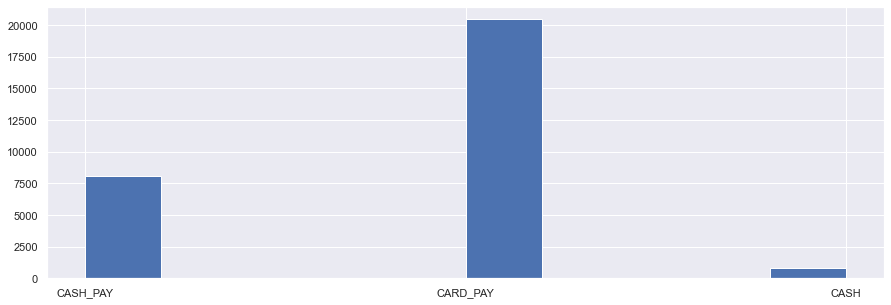

In [51]:
fig=plt.figure(figsize=(15, 5)) 
plt.hist(data=all_data, x="Payment Method")
plt.show()

<b>CASH_PAY</b> and <b>CASH</b> is the same thing !

In [52]:
all_data["Payment Method"] = all_data["Payment Method"].replace("CASH", "CASH_PAY")
all_data["Payment Method"].unique()

array(['CASH_PAY', 'CARD_PAY'], dtype=object)

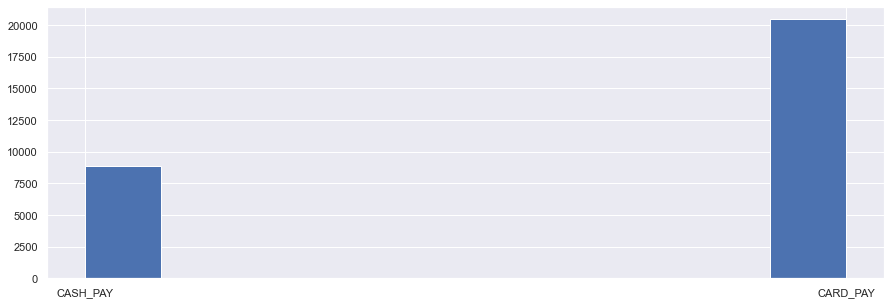

In [53]:
fig=plt.figure(figsize=(15, 5)) 
plt.hist(data=all_data, x="Payment Method")
plt.show()

Now let’s make it <b>categorical</b>

In [54]:
methods = all_data["Payment Method"].unique()
for method in methods :
    if method == "CARD_PAY":
        all_data["Payment Method"] = all_data["Payment Method"].replace(method, 1)
    else :
        all_data["Payment Method"] = all_data["Payment Method"].replace(method, 0)
all_data["Payment Method"].value_counts()

1    20438
0     8838
Name: Payment Method, dtype: int64

In [55]:
all_data["Payment Method"] = all_data["Payment Method"].astype("category")

### `Merchant` column 
It should be categorical.

In [56]:
all_data["Merchant"] = all_data["Merchant"].astype("category")

### `Order Time` column 
It should be in datetime type.

In [57]:
#Verifying non datetime values
all_data[pd.to_datetime(all_data["Order Time"], errors='coerce').isna()]["Order Time"].unique()

array([], dtype=object)

In [58]:
all_data["Order Time"] = pd.to_datetime(all_data["Order Time"], errors='coerce')

### `Customer Country` column
I should deal with missing values and then make it categorcial.

The customer orders an <b>Order ID</b> from a single <b>Country</b>.<br>
I decided to look in orders with missing country values and see if there is a country value in <b>other rows</b>.

In [59]:
all_data["Customer Country"].isna().sum()

79

In [60]:
orders = all_data[all_data["Customer Country"].isna()]["Order ID"].unique()
indexes = all_data[all_data["Customer Country"].isna()].index
for index in indexes :
    order = all_data.loc[index, "Order ID"]
    a = all_data[all_data["Order ID"]==order]["Customer Country"].mode()
    if len(a) != 0 & order in orders :
        all_data.loc[index, "Customer Country"] = a
all_data["Customer Country"].isna().sum()

79

Unfortanitly, all rows of these orders has a <b>missing `Customer Country` cell</b>

Each Customer <b>generally</b> lives in one Country and makes his orders from there.<br>
I decided to replace NaN values with a country value in <b>other rows</b> of the customer if he has only purchased from a single country.

In [61]:
customers = all_data[all_data["Customer Country"].isna()]["Customer ID"].unique()
indexes = all_data[all_data["Customer Country"].isna()].index
for index in indexes :
    customer = all_data.loc[index, "Customer ID"]
    a = all_data[all_data["Customer ID"]==customer]["Customer Country"].mode().values
    if len(a) == 1 :
        if customer in customers :
            all_data.loc[index, "Customer Country"] = a
all_data["Customer Country"].isna().sum()

63

There are still rows with missing country values.<br>
I decided to fill it with the most frequent country in the dataset.

In [62]:
all_data["Customer Country"].mode().values[0]

'Algeria'

In [63]:
all_data["Customer Country"] = all_data["Customer Country"].fillna(all_data["Customer Country"].mode().values[0])
all_data["Customer Country"].isna().sum()

0

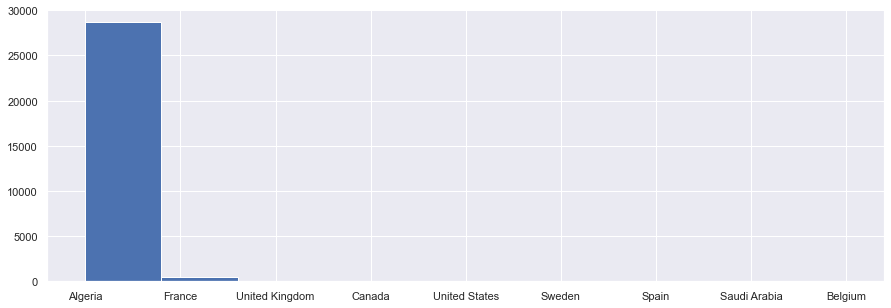

In [64]:
fig=plt.figure(figsize=(15, 5)) 
plt.hist(data=all_data, x="Customer Country")
plt.show()

In [65]:
p = np.round(all_data["Customer Country"].value_counts()["Algeria"] / all_data.shape[0] * 100 , 2)
print(f"Algeria is present in the data with {p}%")

Algeria is present in the data with 97.88%


I will replace all other countries by 0 and Algeria by 1.<br>
So it wil be <b>`1` for Algeria</b> and <b>`0` for other countries</b>.

In [66]:
countries = all_data["Customer Country"].unique()
for country in countries :
    if country == "Algeria":
        all_data["Customer Country"] = all_data["Customer Country"].replace(country, 1)
    else :
        all_data["Customer Country"] = all_data["Customer Country"].replace(country, 0)
all_data["Customer Country"].value_counts()

1    28655
0      621
Name: Customer Country, dtype: int64

In [67]:
all_data["Customer Country"] = all_data["Customer Country"].astype("category")

### `Product Name` column
No missing values so I should only make it categorical.

In [68]:
all_data["Product Name"].value_counts()

03 fardeaux Ifri + 1 offert                                                                   277
2 Fardeaux Ifri                                                                               274
03 Fardeaux Ifri + 1 Offert                                                                   260
IFRI eau minerale 1.5l x 6                                                                    173
SKOR sucre 5kg                                                                                151
                                                                                             ... 
BLEDILAIT 3 grand format 1.2kg                                                                  1
Promo: 1 Depoussierant O'CEDAR + 1 Detachant textile VANISH + 1 Savon Antibacterien Dettol      1
Zambak Plastik - Ensemble Maxitablet Mop - Seau Magique + Balai Ã Plat 360Â° - Bleu             1
MOLFIX mm n1/40pcs                                                                              1
Airpods I15 Original

<br>I chose to ignore products with <b>less than 10 counts</b> (I will consider them as "Other products")

In [69]:
product_set = pd. DataFrame(all_data["Product Name"].value_counts())
product_set = product_set.rename(columns={"Product Name" : "Count"})
products = product_set[product_set["Count"]>10].index
products1 = product_set[product_set["Count"]<=10].index
products

Index(['03 fardeaux Ifri + 1 offert', '2 Fardeaux Ifri',
       '03 Fardeaux Ifri + 1 Offert', 'IFRI eau minerale 1.5l x 6',
       'SKOR sucre 5kg', 'SIM spaghetti NÂ°7 500g', 'Elio 5L',
       'CANDIA lait partiellement ecreme 1l', 'Test Javel 1L',
       'Viande hachee 250 Gr',
       ...
       'Kool 80g', 'DANONE danino 100g', 'AL RAAI beurre 200g',
       'FANTA citron 1l', 'Recharge ooredoo 4000DA', '1001 cafe 250g',
       'RICAMAR thon 3pcs', 'Concombres 250gr',
       'DANONE yaourt aromatise - cocktail 95g', 'Haricots Verts 250gr'],
      dtype='object', length=782)

In [70]:
j=0
for product in products :
    all_data["Product Name"] = all_data["Product Name"].replace(product, j)
    j= j + 1
for product in products1 :
    all_data["Product Name"] = all_data["Product Name"].replace(product, products.shape[0])
all_data["Product Name"].value_counts()

782    8124
0       277
1       274
2       260
3       173
       ... 
776      11
740      11
762      11
736      11
777      11
Name: Product Name, Length: 783, dtype: int64

In [71]:
all_data["Product Name"] = all_data["Product Name"].astype("category")

### Adding a `Week day` column
I decided to add a new column containing the week day of the order.

In [72]:
all_data["Week day"] = all_data["Order Time"].dt.day_name()
all_data["Week day"].value_counts()

Friday       4958
Tuesday      4688
Saturday     4655
Thursday     4218
Monday       3719
Wednesday    3523
Sunday       3515
Name: Week day, dtype: int64

We can easily see that the days ("Friday", "Thursday", and "Saturday") which represents <b>Week-end</b> days are the most present in the data.<br>
So, I can say that it is usefull to add this column.<br>
Now, I have to make it categorical.

In [73]:
days = all_data["Week day"].unique()
i = 0
for day in days :
    all_data["Week day"] = all_data["Week day"].replace(day, i)
    i = i+1

In [74]:
all_data["Week day"] = all_data["Week day"].astype("category")

### Verifying my cleaning result 

In [75]:
summary(all_data)

,Column,Data Type,Unique,Null,%null
0,Order ID,int64,3629,0,0.0
1,Order Status,category,2,0,0.0
2,Product Name,category,783,0,0.0
3,Quantity,int64,44,0,0.0
4,Unit Price,float64,513,0,0.0
5,Total Price,float64,835,0,0.0
6,Sub Total,float64,1699,0,0.0
7,Delivery Charge,float64,82,0,0.0
8,Payment Method,category,2,0,0.0
9,Customer ID,float64,1766,0,0.0


### Reseperating train and test sets

In [76]:
train_final = all_data[all_data.index< train_set.shape[0]]
train_final.loc[:,"Target"] = train_set.loc[:,"Purchase Again"]
test_final = all_data[all_data.index>= train_set.shape[0]]

<a name="toc_3"></a>
## 3. Feature Engineering <a name='Feature Engineering'></a>

We must always remember that in this challenge, we predict the future purchase for each `customer ID`.<br> 
So I created a new "train" and "test" data frames where I summarized the features of each customer. 

In [77]:
train = pd.DataFrame(train_final.groupby("Customer ID"), columns=["Customer ID", "None"])
train.drop("None", axis=1, inplace=True)

In [78]:
test = pd.DataFrame(test_final.groupby("Customer ID"), columns=["Customer ID", "None"])
test.drop("None", axis=1, inplace=True)

### `Number Of Orders` column
I created a column where I put the number of orders purchased by each customer.

In [79]:
dir = {"train": [train, train_final], "test": [test, test_final]}
for data_set in ["train", "test"] :
    for customer in dir[data_set][0]["Customer ID"] :
        orders = len(dir[data_set][1][dir[data_set][1]["Customer ID"]== customer]["Order ID"].unique())
        index = dir[data_set][0][dir[data_set][0]["Customer ID"]==customer].index[0]
        dir[data_set][0].loc[index, "Number Of Orders"] = orders

### `Most Purchased Product` column
I created a column where I put the most purchased product for each customer.

In [80]:
for data_set in ["train", "test"] :
    dir[data_set][0]["Most Purchased Product"] = dir[data_set][1].groupby("Customer ID")["Product Name"].describe()["top"].values

### `Products/Order` column
I created a column where I put the average number of products per order for each customer.

In [81]:
for data_set in ["train", "test"] :
    for customer in dir[data_set][0]["Customer ID"] :
            number = np.round(dir[data_set][1][dir[data_set][1]["Customer ID"]==customer].groupby("Order ID")["Order ID"].describe()["count"].mean(), 2)
            index = dir[data_set][0][dir[data_set][0]["Customer ID"]==customer].index[0]
            dir[data_set][0].loc[index, "Products/Order"] = number

### `Charge/Order` column
I created a column where I put the average delivery charge per order for each customer.

In [82]:
for data_set in ["train", "test"] :
    for customer in dir[data_set][0]["Customer ID"] :
            number = dir[data_set][1][dir[data_set][1]["Customer ID"]==customer].groupby("Order ID")["Delivery Charge"].sum().sum()
            index = dir[data_set][0][dir[data_set][0]["Customer ID"]==customer].index[0]
            dir[data_set][0].loc[index, "Charge/Order"] = number / train.loc[index, "Number Of Orders"]

### `Free Charge` column
I created a column where I put `1` when the customer got a free delivery charge and `0` when he didn't.

In [83]:
for data_set in ["train", "test"] :
    dir[data_set][0]["Free Charge"] = dir[data_set][1].groupby("Customer ID")["Delivery Charge"].min().values == 0
    dir[data_set][0]["Free Charge"] = dir[data_set][0]["Free Charge"].astype("int")

### `Total price` column
I created a column where I put the total price paid by each customer.

In [84]:
# We have to pay attention that the Sub Total value of a unique Order ID is usually present more than once (in every product row)
for data_set in ["train", "test"] :
    dir[data_set][0]["Total Price"] = pd.DataFrame(dir[data_set][1].groupby(["Customer ID", "Order ID"])["Sub Total"].min()).groupby("Customer ID")["Sub Total"].sum().values

### `Most Used Payment Method` column
I created a column where I put the most used payment method by each customer.

In [85]:
for data_set in ["train", "test"] :
    dir[data_set][0]["Most Used Payment Method"] = dir[data_set][1].groupby("Customer ID")["Payment Method"].describe()["top"].values

### `Most Merchant` column
I created a column where I put the merchant from whom each customer has purchased the most.

In [86]:
for data_set in ["train", "test"] :
    dir[data_set][0]["Most Merchant"] = dir[data_set][1].groupby("Customer ID")["Merchant"].describe()["top"].values

### `Country` column
I created a column where I put the country where each customer live.

In [87]:
for data_set in ["train", "test"] :
    dir[data_set][0]["Country"] = dir[data_set][1].groupby("Customer ID")["Customer Country"].describe()["top"].values

### `Most Day` column
I created a column where I put the day in which each customer bought the most.

In [88]:
for data_set in ["train", "test"] :
    dir[data_set][0]["Most Day"] = dir[data_set][1].groupby("Customer ID")["Week day"].describe()["top"].values

### `Recency` Column
I created a column where I put the number of days since each customer recently purchased compared to the last date contained in the data.

In [89]:
last = all_data["Order Time"].max()

for data_set in ["train", "test"] :
    max = pd.DataFrame(dir[data_set][1].groupby("Customer ID")["Order Time"].max())["Order Time"]
    dir[data_set][0]["Recency"] = (last - max).dt.days.values

### `Target` Column
This column contains the variable we will predict.<br>
But lets first make sure that every customer has a one and only one classification.

In [90]:
variable = train_final.groupby("Customer ID")["Target"]
(variable.max() != variable.min()).values.sum()

0

Cool !!

In [91]:
train["Target"] = variable.max().values
train.head()

,Customer ID,Number Of Orders,Most Purchased Product,Products/Order,Charge/Order,Free Charge,Total Price,Most Used Payment Method,Most Merchant,Country,Most Day,Recency,Target
0,1629574.0,4.0,782,1.25,335335.000000,0,1588.0,0,23255526,1,0,8,1
1,1735264.0,1.0,43,1.00,150150.000000,0,3990.0,0,14379582,1,6,3,0
2,1755078.0,2.0,2,2.00,400400.000000,0,2621.0,0,23255526,1,3,7,0
3,1755834.0,9.0,782,3.33,264708.888889,1,21484.0,0,8065701,1,0,2,1
4,1756892.0,3.0,1,1.33,360360.000000,0,1097.0,0,23255526,1,0,2,1


### Dealing with outliers
We have to first detect them

Text(0.5, 1.0, 'Total Price')

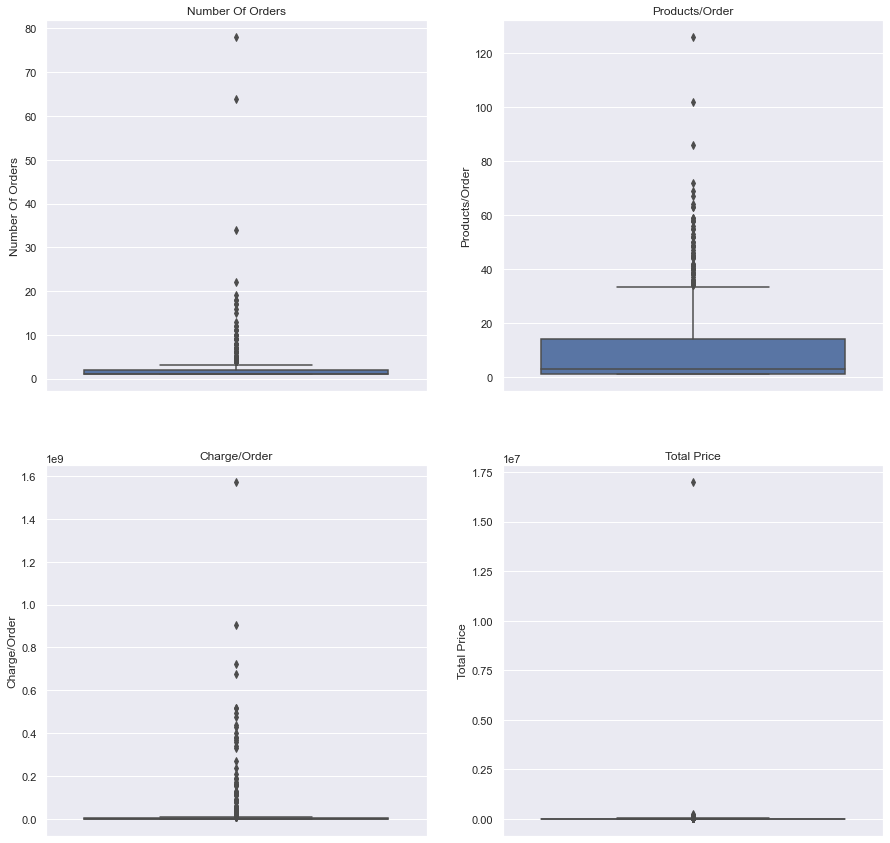

In [92]:
fig=plt.figure(figsize=(15, 15)) 
fig.add_subplot(2,2,1)
sns.boxplot(y=train["Number Of Orders"])
plt.title("Number Of Orders")

fig.add_subplot(2,2,2)
sns.boxplot(y=train["Products/Order"])
plt.title("Products/Order")

fig.add_subplot(2,2,3)
sns.boxplot(y=train["Charge/Order"])
plt.title("Charge/Order")

fig.add_subplot(2,2,4)
sns.boxplot(y=train["Total Price"])
plt.title("Total Price")

#### Deleting outliers

In [93]:
number = train.shape[0]
for column in ["Number Of Orders", "Products/Order", "Charge/Order", "Total Price"] :
    IQR= train[column].quantile(0.75) - train[column].quantile(0.25)
    lower_bridge= train[column].quantile(0.25)-(IQR*3)
    upper_bridge= train[column].quantile(0.75)+(IQR*3)
    train = train[train[column]<upper_bridge]
    train = train[train[column]>lower_bridge]
print(f"We removed {number - train.shape[0]} rows")

We removed 166 rows


Text(0.5, 1.0, 'Total Price')

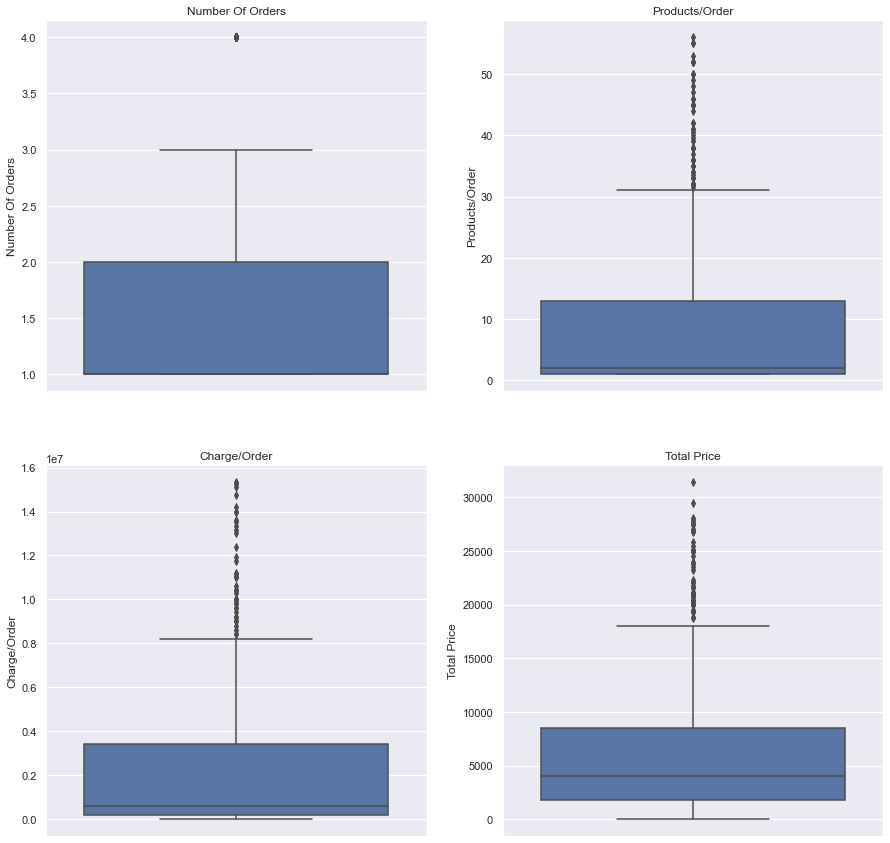

In [94]:
fig=plt.figure(figsize=(15, 15)) 
fig.add_subplot(2,2,1)
sns.boxplot(y=train["Number Of Orders"])
plt.title("Number Of Orders")

fig.add_subplot(2,2,2)
sns.boxplot(y=train["Products/Order"])
plt.title("Products/Order")

fig.add_subplot(2,2,3)
sns.boxplot(y=train["Charge/Order"])
plt.title("Charge/Order")

fig.add_subplot(2,2,4)
sns.boxplot(y=train["Total Price"])
plt.title("Total Price")

### Correlation matrix

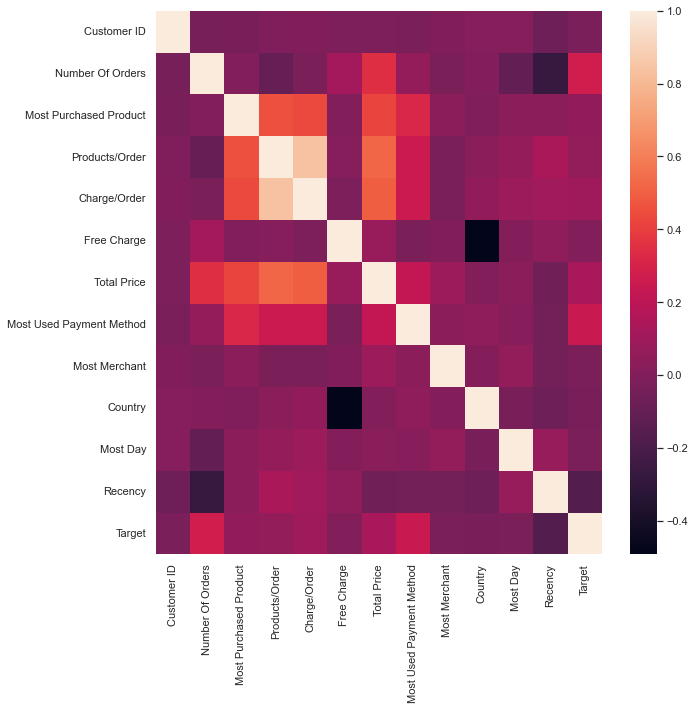

In [95]:
cr = train.corr()
fig=plt.figure(figsize=(10, 10)) 
sns.heatmap(cr)
plt.show()

The heatmap looks great

<a name="toc_4"></a>
## 4. Machine Learning <a name='Machine Learning'></a>

### Using simple Logistic Regression
- Feature scaling (Normalize)
- Fit the model
- Predict Target Value

In [96]:
X = train.drop("Target", axis=1)
y = train["Target"]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

lr_model = LogisticRegression()
lr_model.fit(X_norm, y)

LogisticRegression()

In [97]:
test_norm = scaler.fit_transform(test)
y_pred = lr_model.predict(test_norm)

In [98]:
submission = pd.read_csv("SampleSubmission.csv")
submission["Target"] = y_pred
submission["Target"].value_counts()

0    709
1     58
Name: Target, dtype: int64

In [99]:
submission.to_csv('Submissions\\logistic_regression.csv', index=False)

The score in Zindi using AUC metric was : `0.600412715`

### Using K-Nearest Neighbour
- Grid Search
- Fit the model
- Predict Target Value

In [100]:
parameters = {'n_neighbors':range(1, 50), 
              'weights':['distance', 'uniform']}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), 
                           param_grid = parameters, 
                           scoring = 'roc_auc')

In [101]:
grid_search.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['distance', 'uniform']},
             scoring='roc_auc')

In [102]:
grid_search.best_params_

{'n_neighbors': 45, 'weights': 'uniform'}

In [103]:
knn_model = grid_search.best_estimator_

In [104]:
y_pred1 = knn_model.predict(test)

In [105]:
submission1 = pd.read_csv("SampleSubmission.csv")
submission1["Target"] = y_pred1
submission1["Target"].value_counts()

0    764
1      3
Name: Target, dtype: int64

In [106]:
submission1.to_csv('Submissions\\knn.csv', index=False)

The score in Zindi using AUC metric was : `0.505780939`

### Using Random Forest
- Grid Search
- Fit the model
- Predict Target Value

In [107]:
parameters = {'n_estimators':[100, 150, 200, 250, 300, 350], 
              'ccp_alpha':[0.1, 0.01, 0.001, 0.0001, 0.00001]}
grid_search = GridSearchCV(estimator = RandomForestClassifier(), 
                           param_grid = parameters, 
                           scoring = 'roc_auc')

In [108]:
grid_search.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'n_estimators': [100, 150, 200, 250, 300, 350]},
             scoring='roc_auc')

In [109]:
grid_search.best_params_

{'ccp_alpha': 0.01, 'n_estimators': 150}

In [110]:
random_forrest_model = grid_search.best_estimator_

In [111]:
y_pred2 = random_forrest_model.predict(test)

In [112]:
submission2 = pd.read_csv("SampleSubmission.csv")
submission2["Target"] = y_pred2
submission2["Target"].value_counts()

0    767
Name: Target, dtype: int64

In [113]:
submission2.to_csv('Submissions\\random_forrest.csv', index=False)

The score in Zindi using AUC metric was : `0.503424657`

### Using LightGBM
- Grid Search
- Fit the model
- Predict Target Value

In [114]:
lgbm_model = LGBMClassifier(n_estimators=100, max_depth=2, random_state=42, n_jobs=-1, learning_rate=0.1)
lgbm_model.fit(X, y)

LGBMClassifier(max_depth=2, random_state=42)

In [115]:
y_pred3 = lgbm_model.predict(test)

In [116]:
submission3 = pd.read_csv("SampleSubmission.csv")
submission3["Target"] = y_pred3
submission3["Target"].value_counts()

0    637
1    130
Name: Target, dtype: int64

In [117]:
submission3.to_csv('Submissions\\lgbm.csv', index=False)

The score in Zindi using AUC metric was : `0.643294110`

### Using XGBoost
- Fit the model
- Predict Target Value

In [118]:
parameters = {'n_estimators':range(5),
              'max_depth':range(5),
              'learning_rate':[1, 0.1, 0.01]}
grid_search = GridSearchCV(estimator = XGBClassifier(), 
                           param_grid = parameters, 
                           scoring = 'roc_auc')

In [119]:
grid_search.fit(X, y, eval_metric='rmse')

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             param_grid={'learning_rate': [1, 0.1, 0.01],
                         'max_depth': range(0, 5),
                         'n_estimators': range(0, 5)},
             scoring='roc_auc')

In [120]:
grid_search.best_params_

{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 2}

In [121]:
xgb_model = grid_search.best_estimator_

In [122]:
y_pred4 = xgb_model.predict(test)

In [123]:
submission4 = pd.read_csv("SampleSubmission.csv")
submission4["Target"] = y_pred4
submission4["Target"].value_counts()

0    606
1    161
Name: Target, dtype: int64

In [124]:
submission4.to_csv('Submissions\\xgb.csv', index=False)

The score in Zindi using AUC metric was : `0.647816414`